# Introduction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 파일 불러오기
import pandas as pd

root = '/content/drive/MyDrive/Colab Notebooks/패스트캠퍼스/최종프로젝트/파이널 프로젝트 데이터/'

order = pd.read_csv(root + 'order-9968.txt')
course = pd.read_csv(root + 'course-9968.csv')
customer = pd.read_excel(root + 'customer-9968.xlsx')
refund = pd.read_csv(root + 'refund-9968.csv')
user = pd.read_csv(root + "user-9968.csv")

In [ ]:
# 컬럼명 변경하기
user = user.rename(columns = {'id':'user_id'})
course = course.rename(columns = {'id':'course_id'})

# 1. Data Analysis & Visualization


### 1.1 Descriptive Analysis

> **Q1-1 (Order) 2022년 1월 중 가장 매출이 높았던 3일과 낮았던 3일은 찾기 (status = COMPLETED 기준)**
```
매출이 가장 높았던 3일 :
2022-01-03	￦48,980,000
2022-01-07	￦34,700,000
2022-01-05	￦33,840,000
```
```
매출이 가장 낮았던 3일 :
2022-01-01	￦6,260,000
2022-01-22	￦6,850,000
2022-01-29	￦8,920,000
```

In [ ]:
# 날짜 타입의 데이터로 변경하기
order['created_at'] = pd.to_datetime(order['created_at'])

# 연도/월/일자로만 구성된 YMD 새로운 컬럼을 지정된 위치에 넣기
order.insert(4, 'YMD', order['created_at'].dt.date)

# 2022년 1월 데이터 추출하기
order_subset = order[(order['created_at'].dt.year == 2022) & (order['created_at'].dt.month == 1) & (order['state'] == 'COMPLETED')]

In [ ]:
order_subset.iloc[:3]

,id,type,state,name,YMD,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price
253310,853323,ORDER,COMPLETED,나의 칼퇴치트키 엑,2022-01-31,2022-01-31 23:52:36,2022-01-31 23:54:02,791388,20000,20000,10000,20000
253311,853322,ORDER,COMPLETED,나의 칼퇴치트키 엑,2022-01-31,2022-01-31 23:51:02,2022-01-31 23:51:35,560400,20000,20000,0,20000
253313,853317,ORDER,COMPLETED,클라우드를 활용한,2022-01-31,2022-01-31 23:39:04,2022-01-31 23:39:54,279538,50000,50000,0,50000


In [ ]:
# order 데이터와 2022년 1월 데이터만 추출한 order_subset 데이터 row 개수 확인하기
print(len(order))
print(len(order_subset))

284035
18398


In [ ]:
order_subset.iloc[:3]

,id,type,state,name,YMD,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price
253310,853323,ORDER,COMPLETED,나의 칼퇴치트키 엑,2022-01-31,2022-01-31 23:52:36,2022-01-31 23:54:02,791388,20000,20000,10000,20000
253311,853322,ORDER,COMPLETED,나의 칼퇴치트키 엑,2022-01-31,2022-01-31 23:51:02,2022-01-31 23:51:35,560400,20000,20000,0,20000
253313,853317,ORDER,COMPLETED,클라우드를 활용한,2022-01-31,2022-01-31 23:39:04,2022-01-31 23:39:54,279538,50000,50000,0,50000


In [ ]:
# 일자 별로 매출 확인하기
SalesByYMD = pd.DataFrame(order_subset.groupby(['YMD'])['list_price'].sum()).reset_index()
SalesByYMD.iloc[:5]

,YMD,list_price
0,2022-01-01,6260000
1,2022-01-02,10740000
2,2022-01-03,48980000
3,2022-01-04,26820000
4,2022-01-05,33840000


In [ ]:
# 일자 별 매출을 내림차순 정리하고, 가장 높았던 매출 3개 살펴보기
SalesByYMD.sort_values(by=['list_price'], ascending=False).iloc[:3]

,YMD,list_price
2,2022-01-03,48980000
6,2022-01-07,34700000
4,2022-01-05,33840000


In [ ]:
# 일자 별 매출을 올림차순 정리하고, 가장 낮았던 매출 3개 살펴보기
SalesByYMD.sort_values(by=['list_price']).iloc[:3]

,YMD,list_price
0,2022-01-01,6260000
21,2022-01-22,6850000
28,2022-01-29,8920000


> **Q2-3 (Order) 월별 각 강의 별 할인율은 어떻게 될까요?**


In [ ]:
# 연도/월로만 구성된 YM 새로운 컬럼을 지정된 위치에 넣기
order.insert(4, 'YM', order['created_at'].dt.to_period('M'))

In [ ]:
# 할인율 계산하기
order['DiscountRate'] = round(order['discount_price']/order['list_price']*100, 2)

In [ ]:
order.columns

Index(['id', 'type', 'state', 'name', 'YM', 'YMD', 'created_at', 'updated_at',
       'customer_id', 'list_price', 'sale_price', 'discount_price',
       'tax_free_price', 'DiscountRate'],
      dtype='object')

In [ ]:
# 월별/강의별 평균 할인율
pd.DataFrame(round(order.groupby(['YM', 'name'])['DiscountRate'].mean(), 2))

DiscountRate
YM      name                    
2022-01 (B2B) 42SE          0.00
        (B2B) K-Di         50.00
        (B2B) 디캠프           0.00
        (B2B) 비바리퍼          0.00
        (B2B) 빌리지베          0.00
...                          ...
2022-12 현업 프로젝트로 배          0.00
        현직 Advisor         14.29
        화사한 색감과 빛의         41.67
        확실하게 끝내는 포         45.83
        히어로부터 크리쳐까         52.38

[4496 rows x 1 columns]

> **Q2-4 (Course) 강의 키워드에서 가장 많이 언급된 단어는 무엇인가요?**
```
평생소장
```


In [ ]:
# keywords 컬럼에서 nan 값이 아닌 것들만 추출해서 list에 저장하기
keywords = course[~course['keywords'].isna()]['keywords'].tolist()

In [ ]:
keywords

['오카즈,판타지,게임,일러스트,그림,드로잉,네오아카데미,캐릭터,디자인,네오,세계관',
 '후와리,라이트노벨,캐주얼,일러스트,캐릭터,CG일러스트,라이트,노벨,네오아카데미,네오,게임일러스트',
 'Solana,솔라나,SOLANA,solana,Rust,RUST,rust,솔라나강의,러스트강의,암호화폐,웹3,WEB3,web3,클론코딩,프로그래밍,블록체인취업,blockchain,무료,무료강의,무료 강의',
 '입문,풀스택,웹개발,프로젝트,프론트엔드,Frontend,JS,자바스크립트,JavaScript,React,Node. 노드,Node.js. React,리액트,HTML,상태관리,테스트',
 '자연어처리,NLP,BERT,TRANSFORMER,HUGGINGFACE,자연어처리기초,자연어처리입문,자연어처리 기초,자연어처리 입문,자연어처리 알고리즘,자연어,nlg,klue',
 '인공지능,AI,머신러닝,인공지능기초,인공지능모델구현,인공지능왕초보,인공지능모델,인공지능입문,AI기초,AI입문,딥러닝,딥러닝기초,딥러닝입문',
 '자바,스프링,프로젝트,코틀린,배달앱,백엔드,배민,배달,웹,backend,server,서버,데이터베이스,db,MSA,마이크로서비스,백엔드입문,백엔드기초,웹서버,redis,kafka,rabbitmq,elk,모니터링,docker,도커,springcloud,springsecurity,springboot,springdata,스프링시큐리티,스프링클라우드,스프링부트,mvc,restapi,기본기',
 'PLUSX\t, UXPACK\t, PROCESS\t, 플엑\t, 플러스엑스\t, ux\t, UX\t, PlusX',
 'PLUSX\t, UX1\t, UNDERSTANDING\t, 플러스엑스\t, 플엑\t, UX\t, ux\t, PlusX\t,',
 'PLUSX\t, UX2\t, REASEARCHING\t, 플러스엑스\t, 플엑\t, UX\t, ux',
 'PLUSX\t, UX3\t, BUILDING\t, 플러스엑스\t, ux\t, 유엑스',
 'PLUSX\t, UXOT\t, F

In [ ]:
# 리스트 속 각 요소를 ,로 구분하기
keywords[0].split(",")

['오카즈', '판타지', '게임', '일러스트', '그림', '드로잉', '네오아카데미', '캐릭터', '디자인', '네오', '세계관']

In [ ]:
# keywords 리스트 안에 들어있는 각 요소에서 단어만 추출해서 keywords_corpus 리스트에 저장히기
# 키워드 모으기
keywords_corpus = [keyword for s in keywords for keyword in s.split(",")]

# 키워드 속 불필요한 str 지우기
keywords_corpus = [s.replace("\t", "") for s in keywords_corpus]

In [ ]:
len(keywords_corpus)

6962

In [ ]:
# 각 키워드 빈도세기
keywords_corpus_dict = {}

for s in range(len(keywords_corpus)):

  # keywords_courpuse_dict에 저장되어있지 않은 키워드인 경우엔 {새로운 키워드 : 1}로 딕셔너리의 key 값을 새로운 키워드, value 값을 1로 저장하기
  if keywords_corpus[s] not in keywords_corpus_dict:
    keywords_corpus_dict[keywords_corpus[s]] = 1

  # keywords_courpuse_dict에 이미 저장되어 있는 경우엔 {기존 키워드 : n + 1}로 딕셔너리의 key 값을 기존 키워드, 기존 value 값이 + 1로 저장하기
  else:
    keywords_corpus_dict[keywords_corpus[s]] += 1

In [ ]:
# keywords_corpus_dict를 판다스 데이터 형태로 바꾸기
keyword_frequency = pd.DataFrame.from_dict(keywords_corpus_dict, orient='index', columns=['Frequency']).reset_index()
# 판다스 데이터의 컬럼명 바꾸기
keyword_frequency.columns = ['Keyword', 'Frequency']

# Frequency 컬럼 속 값들을 내림차순 정리하기
keyword_frequency.sort_values(by='Frequency', ascending=False) # 가장 빈도 높게 등장한 키워드 = '평생소장'

,Keyword,Frequency
378,평생소장,91
32,프로그래밍,67
671,데이터사이언스,62
299,마케팅,47
8,디자인,42
...,...,...
1248,쇼핑몰,1
1247,Next.js,1
1246,JD컨설턴트,1
1245,스타기법,1


> **Q2-5 (Refund) 환불이 가장 많은 강의는 어떤 강의였나요?**
```
10개 프로젝트로 -211368
```


In [ ]:
# refund 데이터 확인하기
refund.iloc[:3]

,id,type,state,created_at,updated_at,user_id,course_id,amount,tax_free_amount
0,72124,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 7:29,2022-12-30 7:29,619833.0,214323.0,-20000,-20000
1,72121,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 7:01,2022-12-30 7:01,146614.0,213905.0,-10000,-10000
2,72119,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 6:08,2022-12-30 6:08,541404.0,214402.0,0,0


In [ ]:
course.iloc[:3]

,course_id,type,state,created_at,updated_at,title,description,close_at,total_class_hours,keywords
0,214903,COURSE,ONGOING,2022-12-27 1:33,2022-12-27 1:33,(B2G) K-Di-214903,NaN,NaN,NaN,NaN
1,214898,COURSE,ONGOING,2022-12-26 12:25,2022-12-26 12:25,(B2G) K-Di-214898,NaN,NaN,NaN,NaN
2,214897,COURSE,ONGOING,2022-12-26 12:20,2022-12-26 12:20,(B2G) K-Di-214897,NaN,NaN,NaN,NaN


In [ ]:
# refund 데이터엔 강좌명이 없기때문에 강좌명이 저장되어있는 course 데이터의 title 컬럼 정보 추가하기
# refund 데이터와 course 데이터를 curse_id를 기준으로 left_join하여 합치기
# course 데이터에선 'course_id', 'title' 컬럼만 활용

refund_with_course_name = pd.merge(refund, course[['course_id', 'title']], on=['course_id'], how='left')

In [ ]:
refund_with_course_name.iloc[:3]

,id,type,state,created_at,updated_at,user_id,course_id,amount,tax_free_amount,title
0,72124,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 7:29,2022-12-30 7:29,619833.0,214323.0,-20000,-20000,[쉐어엑스]플러스엑-214323
1,72121,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 7:01,2022-12-30 7:01,146614.0,213905.0,-10000,-10000,초격차 패키지 : -213905
2,72119,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 6:08,2022-12-30 6:08,541404.0,214402.0,0,0,빵형의 수학 없이 -214402


In [ ]:
# 강좌명 세기
refund_title = pd.DataFrame(refund_with_course_name.groupby(['title'])['title'].count())

# 컬럼면 변경하기 (index도 title, column name도 title이라고 저장되어있어서 reset_index()를 했을 때 오류를 방지하기 위해서 임시로 컬럼명 변경)
refund_title = refund_title.rename(columns = {'title': 'title_v2'})

# reset_index() 해서 판다스 데이터 형태로 바꾸기
refund_title = refund_title.reset_index()

# 판다스 컬럼명 바꾸기
refund_title.columns = ['Title', 'Frequency']

In [ ]:
# Frequency를 기준으로 내림차순 정렬하기
refund_title.sort_values(by='Frequency', ascending=False) # 환불을 가장 많이 한 강좌는 10개 프로젝트로 -211368

,Title,Frequency
7,10개 프로젝트로 -211368,269
384,한 번에 끝내는 J-203525,224
420,한 번에 끝내는 프-203720,205
320,일잘러 필수 스킬 -204373,187
188,네오아카데미 : 완-212600,182
...,...,...
377,프리프로덕션부터 배-213160,1
378,피 튀기는 주식 투-211171,1
379,한 권에 끝내는 I-211304,1
96,The RED : -203657,1


> **Q2-6 (Customer) 강의를 가장 많이 신청한 고객과 그 금액은 얼마인가요?**
```
강의를 가장 많이 신청한 customer_id는 793517로 총 338번 강의를 신청함
그 중에 주문을 완료한 경우는 총 307건, 주문 취소 18건, 보류 13건
주문을 완료한 경우인 총 307건 금액의 총합은 ￦7,910,000
```


In [ ]:
order.iloc[:3]

,id,type,state,name,YM,YMD,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price,DiscountRate
0,1600585,ORDER,COMPLETED,[30일 수강] 엑,2022-12,2022-12-31,2022-12-31 23:42:49,2022-12-31 23:42:52,1083679,10000,0,10000,0,100.0
1,1600580,ORDER,COMPLETED,한번에 끝내는 재무,2022-12,2022-12-31,2022-12-31 23:39:01,2022-12-31 23:39:25,129176,40000,40000,0,40000,0.0
2,1600579,ORDER,COMPLETED,네오아카데미 : 까,2022-12,2022-12-31,2022-12-31 23:38:31,2022-12-31 23:39:17,1072552,20000,10000,10000,10000,50.0


In [ ]:
# customer_id를 기준으로 order를 몇 번 했는지 확인하기 위해서 id row 개수세기
TotalRegistrationPerCustomer = pd.DataFrame(order.groupby(['customer_id'])['id'].count().reset_index(name='count'))
# count 컬럼을 기준으로 내림차순 정렬하기
TotalRegistrationPerCustomer.sort_values(by='count', ascending=False).iloc[:3]

,customer_id,count
44576,793517,338
41171,777099,308
44574,793514,246


In [ ]:
# customer_id가 793517인 경우 총 order를 338번 했는데 그 중에서 강좌를 CANCELLED, COMPLETED, PENDING을 몇 번이나 했는지 세기
order[order['customer_id'] == 793517].groupby(['state'])['id'].count()

state
CANCELLED     18
COMPLETED    307
PENDING       13
Name: id, dtype: int64

In [ ]:
# customer_id가 793517인 경우, 각 state에 따른 결제총합 계산하기

order[order['customer_id'] == 793517].groupby(['state'])['list_price'].sum()

state
CANCELLED     430000
COMPLETED    7910000
PENDING       310000
Name: list_price, dtype: int64

> **Q2-7 (Order) 주말과 주중의 평균 강의 신청율은 어떻게 다를까요?**
```
평일에 신청한 강의수는 총 210,976건(74.28%), 주말에 신청한 강의수는 총 73,059건(25.72%)
회원들은 주말보다 평일에 수업을 더 많이 신청한다는 것을 알 수 있었음
```
```
주중은 5일, 주말은 2일이기 때문에 주중과 주말을 같은 단위로 살펴보기 위해서 평일의 강의수는 5로 나누고, 주말의 강의수는 2로 나누어 동일 단위에서도 살펴봄
평일을 기준으로 평균 42,195.2건 (53.6%)
주말을 기준으로 평균 36,529.5건 (46.4%)
동일 단위로 살펴봤을 경우에도 회원들은 주말보다 평일에 수업을 더 많이 신청한다는 것을 알 수 있었음
```



In [ ]:
order.iloc[:3]

,id,type,state,name,YM,YMD,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price,DiscountRate
0,1600585,ORDER,COMPLETED,[30일 수강] 엑,2022-12,2022-12-31,2022-12-31 23:42:49,2022-12-31 23:42:52,1083679,10000,0,10000,0,100.0
1,1600580,ORDER,COMPLETED,한번에 끝내는 재무,2022-12,2022-12-31,2022-12-31 23:39:01,2022-12-31 23:39:25,129176,40000,40000,0,40000,0.0
2,1600579,ORDER,COMPLETED,네오아카데미 : 까,2022-12,2022-12-31,2022-12-31 23:38:31,2022-12-31 23:39:17,1072552,20000,10000,10000,10000,50.0


In [ ]:
order.iloc[:3]

,id,type,state,name,YM,YMD,WeekdayOrWeekend,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price,DiscountRate
0,1600585,ORDER,COMPLETED,[30일 수강] 엑,2022-12,2022-12-31,Weekend,2022-12-31 23:42:49,2022-12-31 23:42:52,1083679,10000,0,10000,0,100.0
1,1600580,ORDER,COMPLETED,한번에 끝내는 재무,2022-12,2022-12-31,Weekend,2022-12-31 23:39:01,2022-12-31 23:39:25,129176,40000,40000,0,40000,0.0
2,1600579,ORDER,COMPLETED,네오아카데미 : 까,2022-12,2022-12-31,Weekend,2022-12-31 23:38:31,2022-12-31 23:39:17,1072552,20000,10000,10000,10000,50.0


In [ ]:
# 주중에 주문한 경우와 주말에 주문한 경우 세기
OrderByWeekdayOrWeekend = pd.DataFrame(order.groupby(['WeekdayOrWeekend'])['id'].count().reset_index(name='count'))

In [ ]:
OrderByWeekdayOrWeekend

,WeekdayOrWeekend,count
0,Weekday,210976
1,Weekend,73059


In [ ]:
# 주말과 주중에 주문하는 비율 계산하기
OrderByWeekdayOrWeekend['Order_Ratio'] = round(OrderByWeekdayOrWeekend['count']/OrderByWeekdayOrWeekend['count'].sum()*100, 2)

In [ ]:
OrderByWeekdayOrWeekend

,WeekdayOrWeekend,count,Order_Ratio
0,Weekday,210976,74.28
1,Weekend,73059,25.72


In [ ]:
# 주말은 총 2일, 주중은 총 5일 이기때문에 동일 단위로 변경하여 주문건수 세기
OrderByWeekdayOrWeekend['OrderPerOneUnit'] = [row['count'] / 5 if row['WeekdayOrWeekend'] == 'Weekday' else row['count'] / 2 for index, row in OrderByWeekdayOrWeekend.iterrows()]

In [ ]:
OrderByWeekdayOrWeekend

,WeekdayOrWeekend,count,Order_Ratio,OrderPerOneUnit
0,Weekday,210976,74.28,42195.2
1,Weekend,73059,25.72,36529.5


In [ ]:
OrderByWeekdayOrWeekend['OrderPerOneUnit_Ratio'] = round(OrderByWeekdayOrWeekend['OrderPerOneUnit']/78724.7*100, 2)

In [ ]:
OrderByWeekdayOrWeekend

,WeekdayOrWeekend,count,Order_Ratio,OrderPerOneUnit,OrderPerOneUnit_Ratio
0,Weekday,210976,74.28,42195.2,53.6
1,Weekend,73059,25.72,36529.5,46.4


**Q2-8 (User) 주로 몇시에 회원 가입(created_at)이 활발했나요? 월별로 차이가 있는지 보여주고, 그 근거를 추론해 보세요**
```
월을 구분하지 않고 회원가입 시간을 살펴봤을 때, 주로 아침 7시에 회원가입을 함
월별로 구분하여 회원가입 시간을 확인해보니, 9월(14시), 12~2월(13시)에는 오후에 가입하고, 다른 월에는 이른 아침 시간(5~7시)에 주로 가입함
```
```
패스트 캠퍼스는 자기계발을 하려는 대학생들과 직장인들이 많이 수강할 것이라고 예상됨.
월별 가입회원수를 살펴보면 12월(약 12.7%)과 1월(약 10.3%)에 가입비율이 높음. 대학생들이 겨울방학 또는 졸업 시즌에 맞춰서 자기계발 또는 취업 준비를 하면서 12~2월 오후에
가입하는 경우가 많을 것으로 예상됨
```



In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123013 entries, 0 to 123012
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          123013 non-null  int64         
 1   type        123013 non-null  object        
 2   state       123013 non-null  object        
 3   created_at  123013 non-null  datetime64[ns]
 4   updated_at  123013 non-null  datetime64[ns]
 5   user_id     123013 non-null  int64         
 6   name        123013 non-null  object        
 7   phone       123013 non-null  int64         
 8   email       123013 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 8.4+ MB


In [ ]:
# 가입 시간의 정보만을 CreatedHour 컬럼에 저장하기
customer.insert(3, 'CreatedHour', [x.hour for x in customer['created_at']])

In [ ]:
customer.iloc[:3]

,id,type,state,CreatedHour,created_at,updated_at,user_id,name,phone,email
0,1482394,USER,NORMAL,4,2024-01-24 04:44:52,2024-01-24 13:54:05,959919,USER_1482394,1012345678,USER_1482394@notexistemail.com
1,1482300,USER,NORMAL,4,2024-01-24 04:43:18,2024-01-25 06:10:38,818301,USER_1482300,1012345678,USER_1482300@notexistemail.com
2,1482071,USER,NORMAL,4,2024-01-24 04:41:50,2024-01-25 07:46:45,543671,USER_1482071,1012345678,USER_1482071@notexistemail.com


In [ ]:
# 가입 시간에 따른 개수 세기 + Count 컬럼을 내림차순 정렬하기
customer.groupby(['CreatedHour'])['id'].count().reset_index(name ='Count').sort_values(by='Count', ascending=False).iloc[:5]

,CreatedHour,Count
7,7,8013
6,6,7951
5,5,7739
13,13,7722
8,8,7561


In [ ]:
customer.iloc[:3]

,id,type,state,CreatedHour,created_at,updated_at,user_id,name,phone,email
0,1482394,USER,NORMAL,4,2024-01-24 04:44:52,2024-01-24 13:54:05,959919,USER_1482394,1012345678,USER_1482394@notexistemail.com
1,1482300,USER,NORMAL,4,2024-01-24 04:43:18,2024-01-25 06:10:38,818301,USER_1482300,1012345678,USER_1482300@notexistemail.com
2,1482071,USER,NORMAL,4,2024-01-24 04:41:50,2024-01-25 07:46:45,543671,USER_1482071,1012345678,USER_1482071@notexistemail.com


In [ ]:
# 월별로 가입 시간의 차이가 있는지 살펴보기 위해서 가입 월 정보만을 CreatedMonth 컬럼에 저장하기
customer.insert(3, 'CreatedMonth', [x.month for x in customer['created_at']])

In [ ]:
# 월별/시간에 따라서 개수 세기
CreatedMonthHour = customer.groupby(['CreatedMonth', 'CreatedHour'])['id'].count().reset_index(name = 'count').sort_values(by=['CreatedMonth', 'count'], ascending=[True, False])

In [ ]:
CreatedMonthHour

,CreatedMonth,CreatedHour,count
13,1,13,865
12,1,12,832
14,1,14,826
6,1,6,791
7,1,7,761
...,...,...,...
286,12,22,217
282,12,18,192
283,12,19,133
285,12,21,126


In [ ]:
# 월 별/시간대 별로 가장 빈도수 높은 순으로 내림차순 정리하기
# 월 별/시간대 별로 빈도수가 높은 순으로 내림차순 정리된 데이터에 월별로 1~24 값을 No 컬럼에 태깅하기
from itertools import cycle
ascending_numbers = cycle(range(1, 25))
CreatedMonthHour['No'] = [next(ascending_numbers) for _ in range(len(CreatedMonthHour))]

In [ ]:
CreatedMonthHour[CreatedMonthHour['No'] == 1] # No가 1인 값(월별로 가장 높은 빈도수가 높았던 시간 정보 추출)들만 추출하기

,CreatedMonth,CreatedHour,count,No
13,1,13,865,1
37,2,13,635,1
53,3,5,635,1
79,4,7,536,1
103,5,7,555,1
126,6,6,596,1
151,7,7,748,1
175,8,7,769,1
206,9,14,697,1
221,10,5,599,1


In [ ]:
CreatedMonthHour[CreatedMonthHour['No'] == 2] # No가 1인 값(월별로 가장 높은 빈도수가 높았던 시간 정보 추출)들만 추출하기

,CreatedMonth,CreatedHour,count,No
12,1,12,832,2
38,2,14,609,2
54,3,6,604,2
78,4,6,516,2
101,5,5,553,2
128,6,8,591,2
150,7,6,707,2
181,8,13,748,2
205,9,13,677,2
223,10,7,582,2


In [ ]:
customer.iloc[:3]

,id,type,state,CreatedMonth,CreatedHour,created_at,updated_at,user_id,name,phone,email
0,1482394,USER,NORMAL,1,4,2024-01-24 04:44:52,2024-01-24 13:54:05,959919,USER_1482394,1012345678,USER_1482394@notexistemail.com
1,1482300,USER,NORMAL,1,4,2024-01-24 04:43:18,2024-01-25 06:10:38,818301,USER_1482300,1012345678,USER_1482300@notexistemail.com
2,1482071,USER,NORMAL,1,4,2024-01-24 04:41:50,2024-01-25 07:46:45,543671,USER_1482071,1012345678,USER_1482071@notexistemail.com


In [ ]:
# 가입월 비율 계산하기
customer['CreatedMonth'].value_counts(normalize=True)

CreatedMonth
12    0.127019
1     0.102981
8     0.093754
9     0.083113
7     0.082902
11    0.079260
2     0.077520
3     0.076187
10    0.074561
6     0.070066
5     0.066708
4     0.065928
Name: proportion, dtype: float64

> **Q2-9 (Order) 강의 가격(list_price)을 5만원 단위의 도수분포표로 나타내 주세요.**



In [ ]:
# order 데이터에서 강의명과 강의가격 컬럼만 추출하고, 중복된 값 제외하기
CoursePrice = order[['name', 'list_price']].drop_duplicates()

In [ ]:
# 패스트 캠퍼스에 여태까지 개설된 강좌
print('총 강의수 : ', len(CoursePrice), '건')
print('고유한 강의명 : ', len(CoursePrice['name'].unique()), '건')

총 강의수 :  1671 건
고유한 강의명 :  1110 건


In [ ]:
CoursePrice.iloc[:3]

,name,list_price
0,[30일 수강] 엑,10000
1,한번에 끝내는 재무,40000
2,네오아카데미 : 까,20000


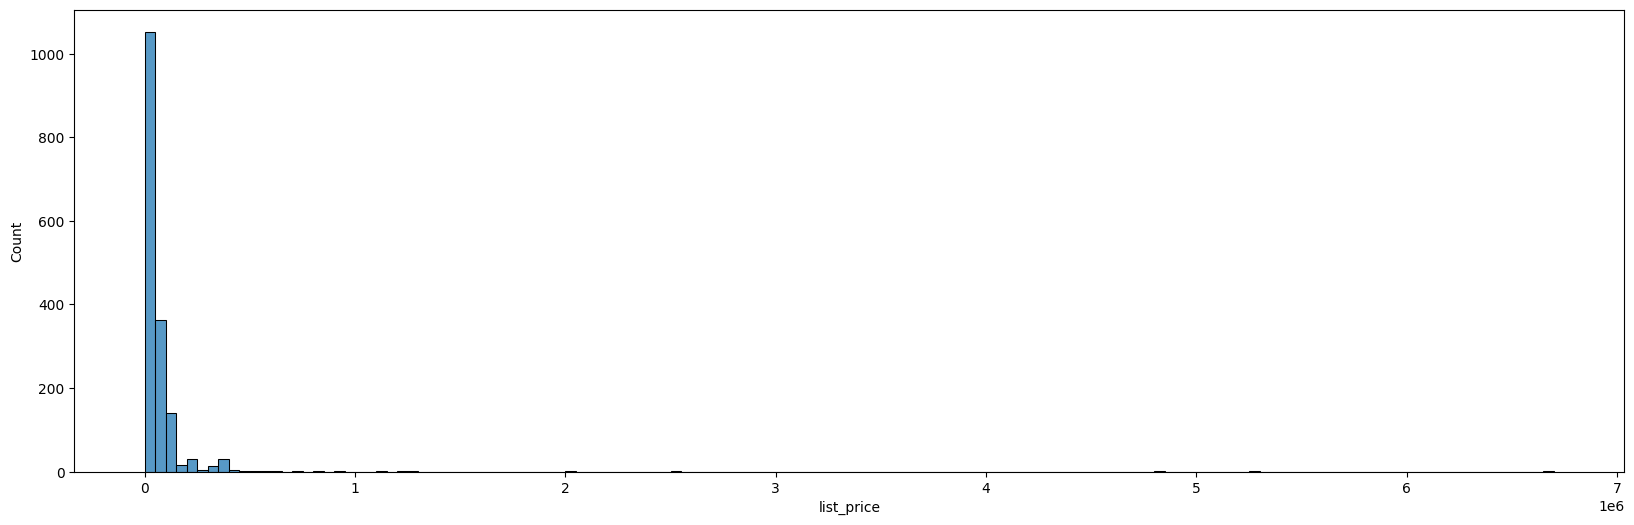

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

max_price = CoursePrice['list_price'].max()

plt.figure(figsize=(20, 6))

customer_bins = list(range(0, int(max_price) + 50000, 50000))
sns.histplot(data=CoursePrice, x='list_price', bins=customer_bins)

plt.show()

In [ ]:
# 강의가격 살펴보기
CoursePrice['list_price'].describe() # 전체 강좌의 75%는 7만원 이하, 가장 가격이 저렴한 강의는 1만원

count    1.671000e+03
mean     7.514662e+04
std      2.675056e+05
min      1.000000e+04
25%      2.000000e+04
50%      4.000000e+04
75%      6.000000e+04
max      6.690000e+06
Name: list_price, dtype: float64

In [ ]:
# 강의가격별 강의수 개수세기
print("총 강의수 : ", len(CoursePrice))
print("100만원이 넘는 강의수 : ", len(CoursePrice[CoursePrice['list_price'] > 1000000]))
print("80만원이 넘는 강의수 : ", len(CoursePrice[CoursePrice['list_price'] > 800000]))
print("50만원이 넘는 강의수 : ", len(CoursePrice[CoursePrice['list_price'] > 500000]))
print("10만원이 넘는 강의수 : ", len(CoursePrice[CoursePrice['list_price'] > 100000]))
print("7만원이 넘는 강의수 : ", len(CoursePrice[CoursePrice['list_price'] > 70000]))

총 강의수 :  1671
100만원이 넘는 강의수 :  9
80만원이 넘는 강의수 :  12
50만원이 넘는 강의수 :  17
10만원이 넘는 강의수 :  202
7만원이 넘는 강의수 :  326


In [ ]:
CoursePrice[CoursePrice['list_price'] <= 70000]['list_price'].describe()

count     1345.000000
mean     32579.925651
std      14045.728305
min      10000.000000
25%      20000.000000
50%      30000.000000
75%      40000.000000
max      70000.000000
Name: list_price, dtype: float64

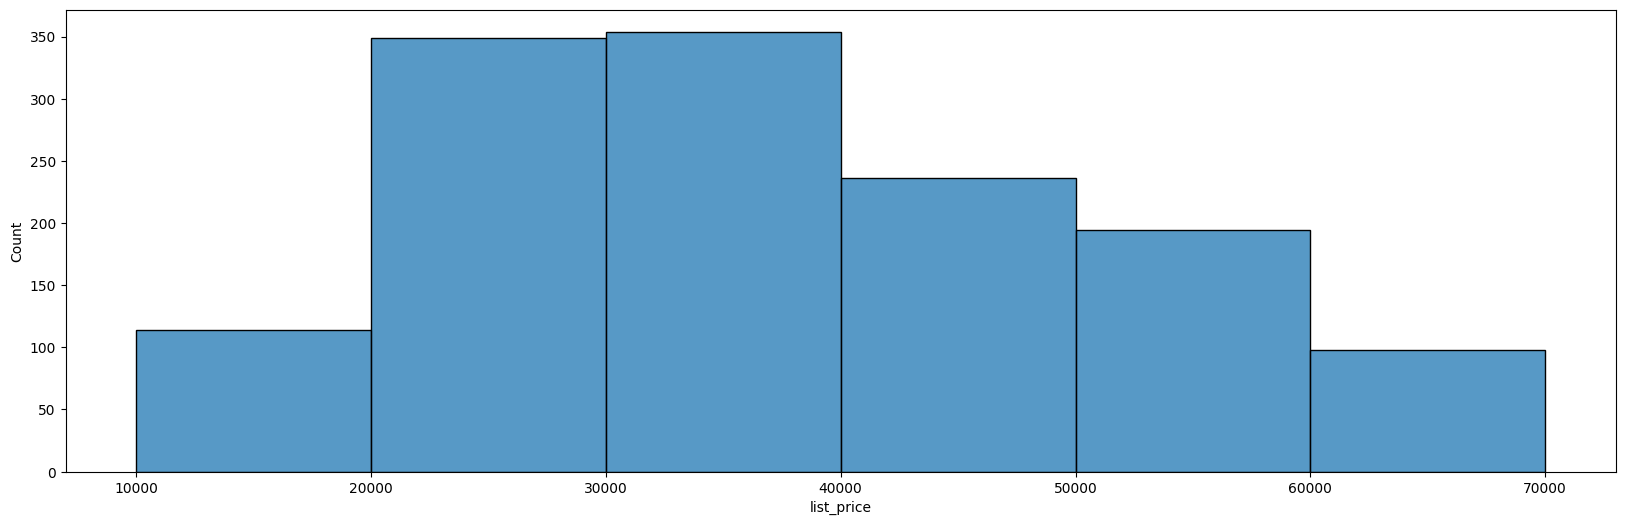

In [ ]:
# 75%의 강의가 7만원 이하였기에 7만원 이하의 강의들을 1만원 단위로 나누어 히스토그램 그리기
max_price = CoursePrice[CoursePrice['list_price'] <= 70000]['list_price'].max()

plt.figure(figsize=(20, 6))

customer_bins = list(range(10000, int(max_price) + 10000, 10000))
sns.histplot(data=CoursePrice[CoursePrice['list_price'] <= 70000], x='list_price', bins=customer_bins)

plt.xticks(ticks=range(10000, int(max_price) + 10000, 10000))

plt.show()

> **Q2-10 (Order) 신청이 완료된 강의(complated)와 진행중인 강의(pending), 그리고 취소된 강의(cancelled) 간의 금액(list_price)과 유저의 비중을 월별로 각각 구하시오?**


In [ ]:
order.iloc[:3]

,id,type,state,name,YM,YMD,WeekdayOrWeekend,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price,DiscountRate
0,1600585,ORDER,COMPLETED,[30일 수강] 엑,2022-12,2022-12-31,Weekend,2022-12-31 23:42:49,2022-12-31 23:42:52,1083679,10000,0,10000,0,100.0
1,1600580,ORDER,COMPLETED,한번에 끝내는 재무,2022-12,2022-12-31,Weekend,2022-12-31 23:39:01,2022-12-31 23:39:25,129176,40000,40000,0,40000,0.0
2,1600579,ORDER,COMPLETED,네오아카데미 : 까,2022-12,2022-12-31,Weekend,2022-12-31 23:38:31,2022-12-31 23:39:17,1072552,20000,10000,10000,10000,50.0


In [ ]:
# state/월별 금액의 합계

order.groupby(['state', 'YM'])['list_price'].sum().reset_index()

,state,YM,list_price
0,CANCELLED,2022-01,218380000
1,CANCELLED,2022-02,140410000
2,CANCELLED,2022-03,138870000
3,CANCELLED,2022-04,132670000
4,CANCELLED,2022-05,105310000
5,CANCELLED,2022-06,126730000
6,CANCELLED,2022-07,166920000
7,CANCELLED,2022-08,142310000
8,CANCELLED,2022-09,149670000
9,CANCELLED,2022-10,131900000


In [ ]:
# 신청이 완료된 강의의 월별 유저 비중
CompletedPerMonth = order[order['state'] == 'COMPLETED'].groupby(['YM'])['YM'].value_counts().reset_index()
CompletedPerMonth['ratio'] = round(CompletedPerMonth['count']/CompletedPerMonth['count'].sum()*100, 2)

CompletedPerMonth

,YM,count,ratio
0,2022-01,18398,10.45
1,2022-02,14632,8.31
2,2022-03,12033,6.83
3,2022-04,10906,6.19
4,2022-05,10786,6.13
5,2022-06,12699,7.21
6,2022-07,14965,8.50
7,2022-08,13824,7.85
8,2022-09,13091,7.43
9,2022-10,13486,7.66


In [ ]:
# 진행 중인 강의의 월별 유저 비중
PendingPerMonth = order[order['state'] == 'PENDING'].groupby(['YM'])['YM'].value_counts().reset_index()
PendingPerMonth['ratio'] = round(PendingPerMonth['count']/PendingPerMonth['count'].sum()*100, 2)

PendingPerMonth

,YM,count,ratio
0,2022-01,5346,10.73
1,2022-02,3807,7.64
2,2022-03,3363,6.75
3,2022-04,3217,6.46
4,2022-05,2996,6.02
5,2022-06,3914,7.86
6,2022-07,3944,7.92
7,2022-08,5725,11.49
8,2022-09,4087,8.21
9,2022-10,3463,6.95


In [ ]:
# 취소된 강의의 월별 유저 비중
CancelledPerMonth = order[order['state'] == 'CANCELLED'].groupby(['YM'])['YM'].value_counts().reset_index()
CancelledPerMonth['ratio'] = round(CancelledPerMonth['count']/CancelledPerMonth['count'].sum()*100, 2)

CancelledPerMonth

,YM,count,ratio
0,2022-01,6981,12.01
1,2022-02,4989,8.58
2,2022-03,4595,7.90
3,2022-04,3989,6.86
4,2022-05,3374,5.80
5,2022-06,4385,7.54
6,2022-07,4844,8.33
7,2022-08,5090,8.75
8,2022-09,5043,8.67
9,2022-10,4539,7.81


> **Q2-11 (User) state이 HIBERNATED 된 Used들은 ID를 생성(created_at)하고 마지막 로그인(last_login_at)까지 평균적으로 몇일이 걸렸나요?**
```
평균적으로 154.11일 걸림
```


In [ ]:
#user = pd.read_csv(root + "user-9968.csv")
user.iloc[:3]

,user_id,type,state,created_at,updated_at,last_login_at,username
0,1075089,USER,NORMAL,2022-12-31 23:39:19,2023-12-02 00:00:22,2022-12-31 23:44:35,dkfk
1,1075079,USER,NORMAL,2022-12-31 23:08:47,2023-12-03 23:34:39,2023-12-03 23:34:40,toqu
2,1075074,USER,NORMAL,2022-12-31 22:46:31,2023-10-19 11:49:10,2023-10-19 11:49:10,theh


In [ ]:
# 컬럼 데이터 형태를 datetime 형태로 바꾸기
user['created_at'] = pd.to_datetime(user['created_at'])
user['last_login_at'] = pd.to_datetime(user['last_login_at'])

In [ ]:
user['last_login_at'].iloc[0]

Timestamp('2022-12-31 23:44:35')

In [ ]:
user['created_at'].iloc[0]

Timestamp('2022-12-31 23:39:19')

In [ ]:
# 유저 별로 ID를 생성(created_at)하고 마지막 로그인(last_login_at)까지 소요된 일(days) 구하기
user['(last_login - created) days'] = [(row['last_login_at'] - row['created_at']).days for index, row in user.iterrows()]

In [ ]:
user.iloc[:5]

,id,type,state,created_at,updated_at,last_login_at,username,(last_login - created) days
0,1075089,USER,NORMAL,2022-12-31 23:39:19,2023-12-02 00:00:22,2022-12-31 23:44:35,dkfk,0
1,1075079,USER,NORMAL,2022-12-31 23:08:47,2023-12-03 23:34:39,2023-12-03 23:34:40,toqu,337
2,1075074,USER,NORMAL,2022-12-31 22:46:31,2023-10-19 11:49:10,2023-10-19 11:49:10,theh,291
3,1075064,USER,NORMAL,2022-12-31 22:03:14,2023-10-06 18:20:51,2023-10-06 18:20:51,tige,278
4,1075059,USER,NORMAL,2022-12-31 21:35:42,2023-02-17 01:54:52,2023-02-17 01:54:52,kyg6,47


In [ ]:
# ID를 생성(created_at)하고 마지막 로그인(last_login_at)까지 소요된 일(days) 평균값 구하기
round(user[user['state'] == 'HIBERNATED']['(last_login - created) days'].mean(), 2)

154.11

## 2.2 Trend Analysis
각 Dataset(order, course, user, customer and refund)에서
2022년 1월 부터 12월까지의 데이터를 월별로 집계하여 볼 수 있는 트렌드를 하나씩만 보여주세요. Trend를 이용할 때는 어떤 차트를 이용하는 것이 좋을까요?

In [ ]:
order['YM'].unique()

<PeriodArray>
['2022-12', '2022-11', '2022-10', '2022-09', '2022-08', '2022-07', '2022-06',
 '2022-05', '2022-04', '2022-03', '2022-02', '2022-01']
Length: 12, dtype: period[M]

In [ ]:
order.iloc[:3]

,id,type,state,name,YM,YMD,WeekdayOrWeekend,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price,DiscountRate
0,1600585,ORDER,COMPLETED,[30일 수강] 엑,2022-12,2022-12-31,Weekend,2022-12-31 23:42:49,2022-12-31 23:42:52,1083679,10000,0,10000,0,100.0
1,1600580,ORDER,COMPLETED,한번에 끝내는 재무,2022-12,2022-12-31,Weekend,2022-12-31 23:39:01,2022-12-31 23:39:25,129176,40000,40000,0,40000,0.0
2,1600579,ORDER,COMPLETED,네오아카데미 : 까,2022-12,2022-12-31,Weekend,2022-12-31 23:38:31,2022-12-31 23:39:17,1072552,20000,10000,10000,10000,50.0


In [ ]:
# 월별 주문수 트렌드 확인하기
a = order.groupby(['YM'])['YM'].value_counts().reset_index()
a

,YM,count
0,2022-01,30725
1,2022-02,23428
2,2022-03,19991
3,2022-04,18112
4,2022-05,17156
5,2022-06,20998
6,2022-07,23753
7,2022-08,24639
8,2022-09,22221
9,2022-10,21488


In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype    
---  ------  --------------  -----    
 0   YM      12 non-null     period[M]
 1   count   12 non-null     int64    
dtypes: int64(1), period[M](1)
memory usage: 320.0 bytes


<Axes: xlabel='YM', ylabel='count'>

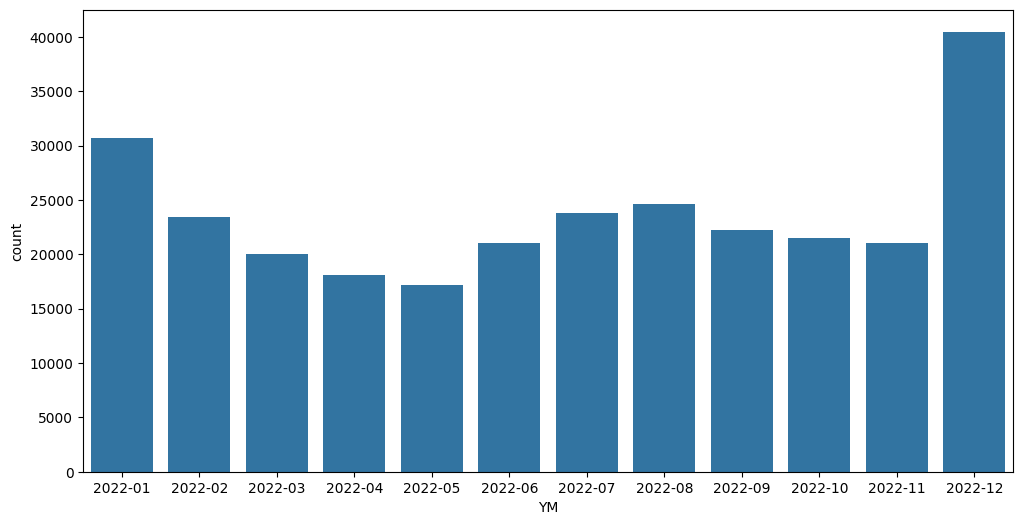

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=a, x='YM', y='count')

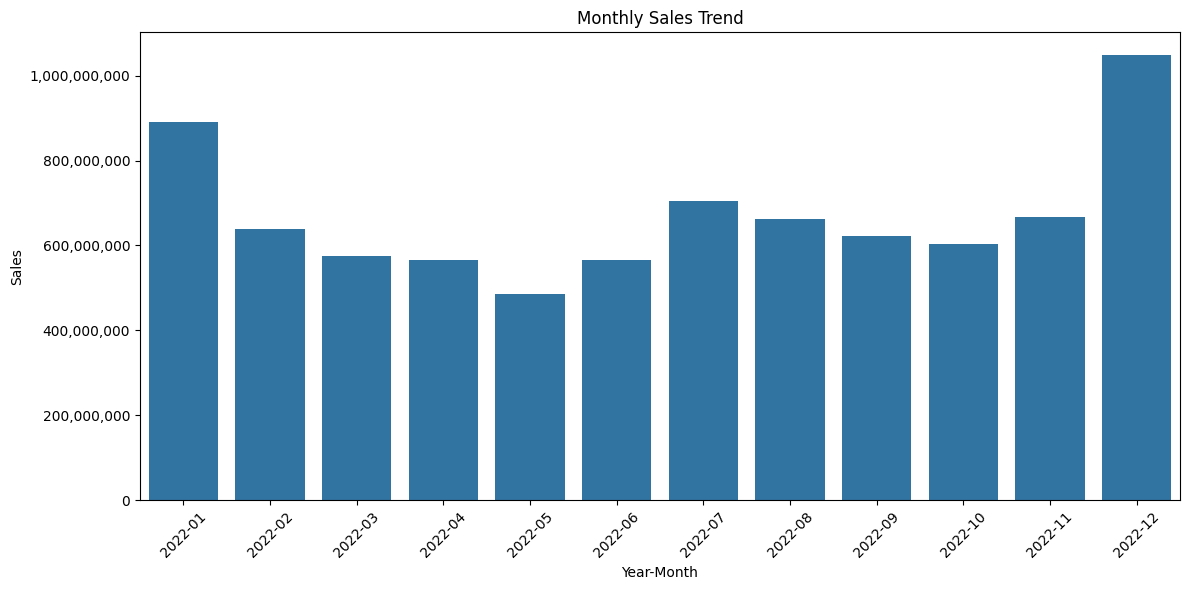

In [ ]:
# 월별 매출액 트렌드 확인하기
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

monthly_sales = order.groupby(['YM'])['list_price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='YM', y='list_price')

plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
course.iloc[:3]

,course_id,type,state,created_at,updated_at,title,description,close_at,total_class_hours,keywords
0,214903,COURSE,ONGOING,2022-12-27 1:33,2022-12-27 1:33,(B2G) K-Di-214903,NaN,NaN,NaN,NaN
1,214898,COURSE,ONGOING,2022-12-26 12:25,2022-12-26 12:25,(B2G) K-Di-214898,NaN,NaN,NaN,NaN
2,214897,COURSE,ONGOING,2022-12-26 12:20,2022-12-26 12:20,(B2G) K-Di-214897,NaN,NaN,NaN,NaN


In [ ]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   course_id          722 non-null    int64         
 1   type               722 non-null    object        
 2   state              722 non-null    object        
 3   M                  722 non-null    int32         
 4   Y                  722 non-null    period[A-DEC] 
 5   YM                 722 non-null    period[M]     
 6   created_at         722 non-null    datetime64[ns]
 7   updated_at         722 non-null    object        
 8   title              722 non-null    object        
 9   description        554 non-null    object        
 10  close_at           15 non-null     object        
 11  total_class_hours  578 non-null    float64       
 12  keywords           540 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(7), 

In [ ]:
course['Y'].unique()

<PeriodArray>
['2022', '2021', '2020', '2019', '2018']
Length: 5, dtype: period[A-DEC]

In [ ]:
# 월별 주문수 트렌드 확인하기
a = course[course['Y'] == '2022'].groupby(['YM'])['YM'].value_counts().reset_index()
a

,YM,count
0,2022-01,57
1,2022-02,19
2,2022-03,30
3,2022-04,40
4,2022-05,59
5,2022-06,39
6,2022-07,42
7,2022-08,33
8,2022-09,19
9,2022-10,27


In [ ]:
course['created_at'] = pd.to_datetime(course['created_at'])
course.insert(3, 'YM', course['created_at'].dt.to_period('M'))

In [ ]:
course.iloc[:3]

,course_id,type,state,YM,created_at,updated_at,title,description,close_at,total_class_hours,keywords
0,214903,COURSE,ONGOING,2022-12,2022-12-27 01:33:00,2022-12-27 1:33,(B2G) K-Di-214903,NaN,NaN,NaN,NaN
1,214898,COURSE,ONGOING,2022-12,2022-12-26 12:25:00,2022-12-26 12:25,(B2G) K-Di-214898,NaN,NaN,NaN,NaN
2,214897,COURSE,ONGOING,2022-12,2022-12-26 12:20:00,2022-12-26 12:20,(B2G) K-Di-214897,NaN,NaN,NaN,NaN


In [ ]:
course.insert(3, 'Y', course['created_at'].dt.to_period('Y'))

In [ ]:
course.insert(3, 'M', course['created_at'].dt.month)

In [ ]:
course['M'] = course['created_at'].dt.month

In [ ]:
course.iloc[:3]

,course_id,type,state,M,Y,YM,created_at,updated_at,title,description,close_at,total_class_hours,keywords
0,214903,COURSE,ONGOING,12,2022,2022-12,2022-12-27 01:33:00,2022-12-27 1:33,(B2G) K-Di-214903,NaN,NaN,NaN,NaN
1,214898,COURSE,ONGOING,12,2022,2022-12,2022-12-26 12:25:00,2022-12-26 12:25,(B2G) K-Di-214898,NaN,NaN,NaN,NaN
2,214897,COURSE,ONGOING,12,2022,2022-12,2022-12-26 12:20:00,2022-12-26 12:20,(B2G) K-Di-214897,NaN,NaN,NaN,NaN


In [ ]:
a = course[course['Y'] == '2022'].groupby(['M'])['M'].count().reset_index(name='count')
a

,M,count
0,1,57
1,2,19
2,3,30
3,4,40
4,5,59
5,6,39
6,7,42
7,8,33
8,9,19
9,10,27


<Axes: xlabel='M', ylabel='count'>

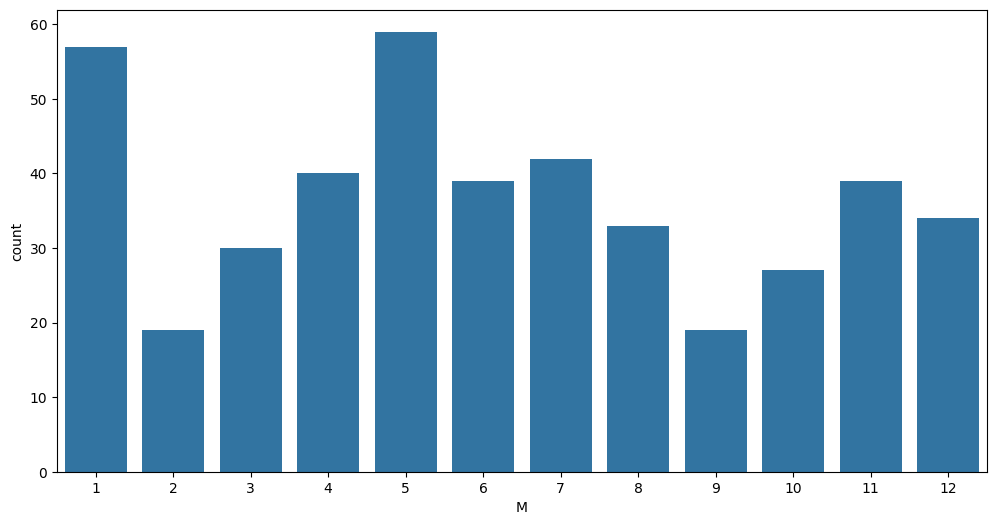

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=a, x='M', y='count') # 2022년도엔 1월과 5월에 강의가 많이 개설됨

In [ ]:
# 가입하는 월
user.iloc[:3]

,user_id,type,state,created_at,updated_at,last_login_at,username,(last_login - created) days
0,1075089,USER,NORMAL,2022-12-31 23:39:19,2023-12-02 00:00:22,2022-12-31 23:44:35,dkfk,0
1,1075079,USER,NORMAL,2022-12-31 23:08:47,2023-12-03 23:34:39,2023-12-03 23:34:40,toqu,337
2,1075074,USER,NORMAL,2022-12-31 22:46:31,2023-10-19 11:49:10,2023-10-19 11:49:10,theh,291


In [ ]:
user.insert(3, 'M', user['created_at'].dt.month)

In [ ]:
user.iloc[:3]

,user_id,type,state,M,created_at,updated_at,last_login_at,username,(last_login - created) days
0,1075089,USER,NORMAL,12,2022-12-31 23:39:19,2023-12-02 00:00:22,2022-12-31 23:44:35,dkfk,0
1,1075079,USER,NORMAL,12,2022-12-31 23:08:47,2023-12-03 23:34:39,2023-12-03 23:34:40,toqu,337
2,1075074,USER,NORMAL,12,2022-12-31 22:46:31,2023-10-19 11:49:10,2023-10-19 11:49:10,theh,291


<Axes: xlabel='M', ylabel='count'>

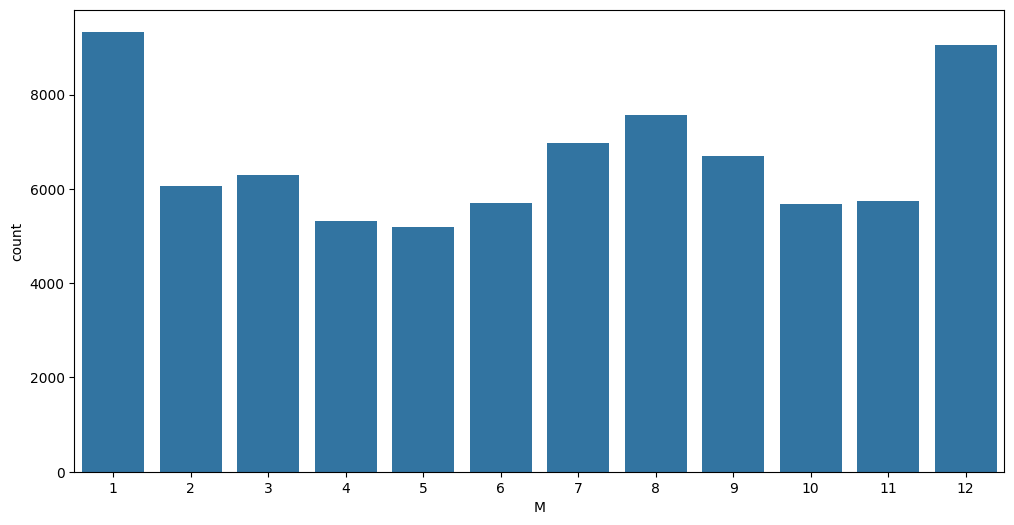

In [ ]:
# 12~1월에 가입하는 회원들이 많음
a = user[user['created_at'].dt.year == 2022].groupby(['M'])['M'].value_counts().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=a, x='M', y='count') # 2022년도엔 1월과 5월에 강의가 많이 개설됨

In [ ]:
refund.iloc[:3]

,id,type,state,created_at,updated_at,user_id,course_id,amount,tax_free_amount
0,72124,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 7:29,2022-12-30 7:29,619833.0,214323.0,-20000,-20000
1,72121,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 7:01,2022-12-30 7:01,146614.0,213905.0,-10000,-10000
2,72119,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 6:08,2022-12-30 6:08,541404.0,214402.0,0,0


In [ ]:
refund['created_at'] = pd.to_datetime(refund['created_at'])

In [ ]:
refund.insert(3, 'M', refund['created_at'].dt.month)

In [ ]:
refund.iloc[:3]

,id,type,state,M,created_at,updated_at,user_id,course_id,amount,tax_free_amount
0,72124,ADMIN_AUTO_REFUND,COMPLETED,12,2022-12-30 07:29:00,2022-12-30 7:29,619833.0,214323.0,-20000,-20000
1,72121,ADMIN_AUTO_REFUND,COMPLETED,12,2022-12-30 07:01:00,2022-12-30 7:01,146614.0,213905.0,-10000,-10000
2,72119,ADMIN_AUTO_REFUND,COMPLETED,12,2022-12-30 06:08:00,2022-12-30 6:08,541404.0,214402.0,0,0


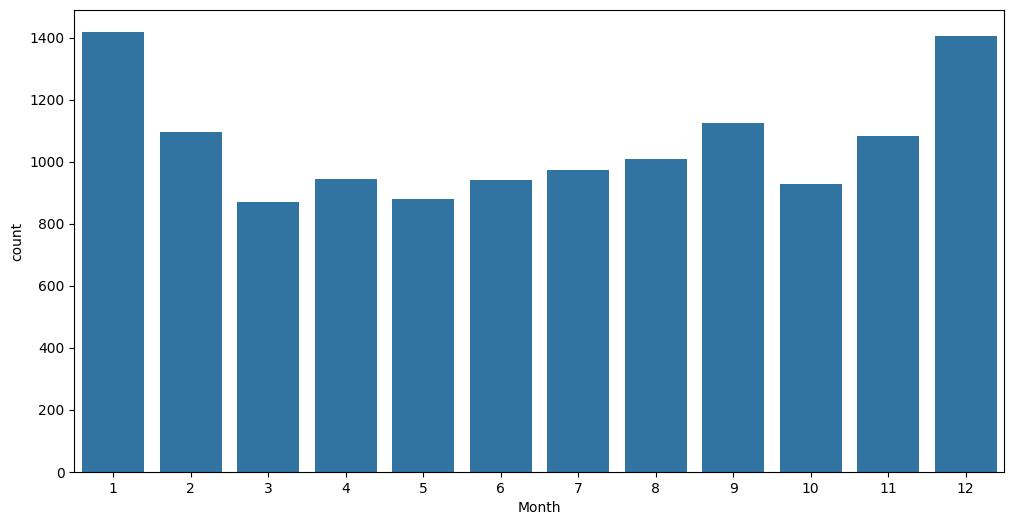

In [ ]:
# 12~1월에 환불하는 회원들이 많음
a = refund[refund['created_at'].dt.year == 2022].groupby(['M'])['M'].value_counts().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=a, x='M', y='count') # 2022년도엔 1월, 12월에 환불이 많음
plt.xlabel('Month')
plt.show()

In [ ]:
refund.iloc[:3]

,id,type,state,M,created_at,updated_at,user_id,course_id,amount,tax_free_amount
0,72124,ADMIN_AUTO_REFUND,COMPLETED,12,2022-12-30 07:29:00,2022-12-30 7:29,619833.0,214323.0,-20000,-20000
1,72121,ADMIN_AUTO_REFUND,COMPLETED,12,2022-12-30 07:01:00,2022-12-30 7:01,146614.0,213905.0,-10000,-10000
2,72119,ADMIN_AUTO_REFUND,COMPLETED,12,2022-12-30 06:08:00,2022-12-30 6:08,541404.0,214402.0,0,0


<Axes: xlabel='M', ylabel='count'>

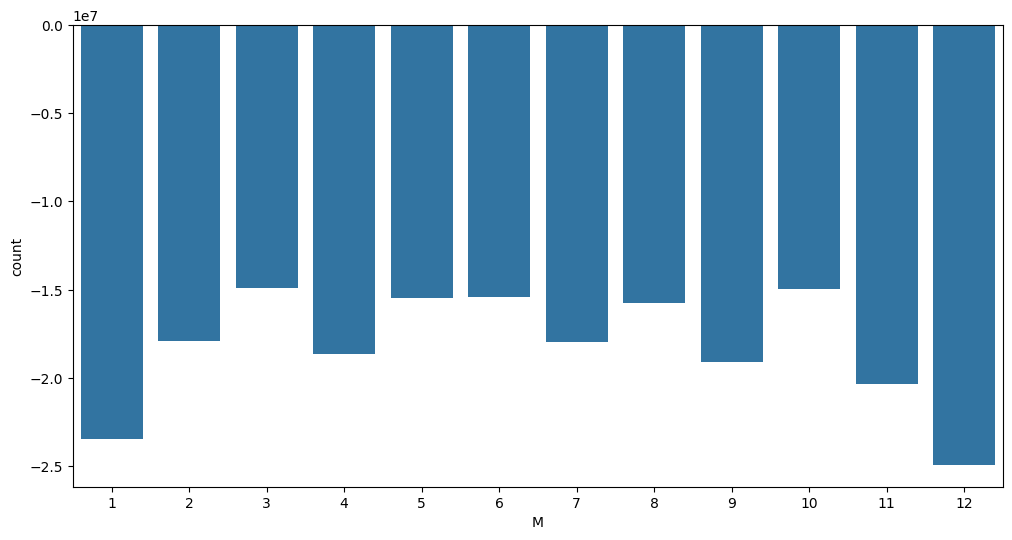

In [ ]:
# 12월과 1월에 환불 총액이 큼
a = refund[refund['created_at'].dt.year == 2022].groupby(['M'])['amount'].sum().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=a, x='M', y='count') # 2022년도엔 1월, 12월에 환불이 많음

# 3. Data Documentation & Reporting


## 3.1 Data Documentation


## 3.2 Data Reporting(Dashboard)


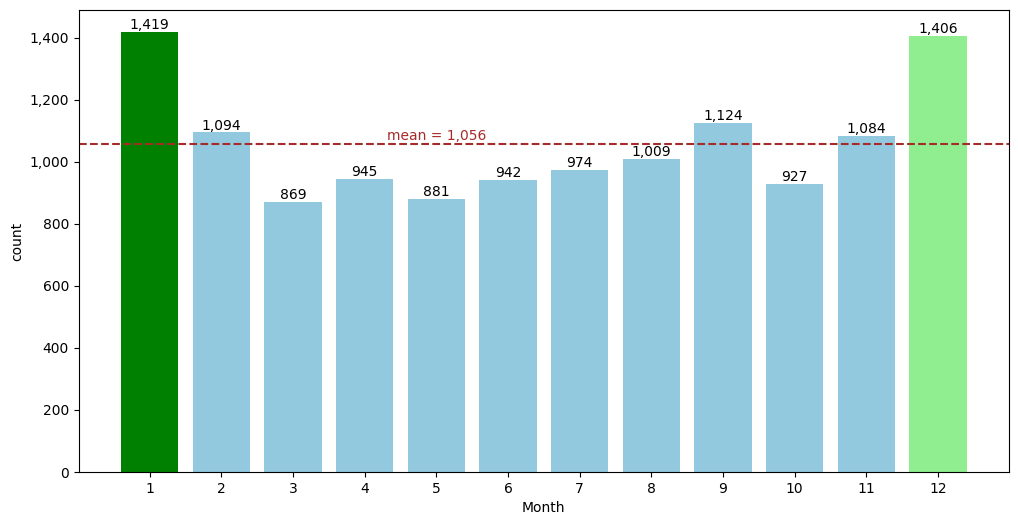

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

a = refund[refund['created_at'].dt.year == 2022].groupby(['M'])['M'].value_counts().reset_index(name='count')

plt.figure(figsize=(12, 6))

sns.barplot(data=a, x='M', y='count', color='skyblue')

max_index = a['count'].idxmax()
second_max_index = a['count'].nlargest(2).idxmin()

plt.bar(max_index, a.loc[max_index, 'count'], color='green')
plt.bar(second_max_index, a.loc[second_max_index, 'count'], color='lightgreen', label='Second Highest')

plt.xlabel('Month')

formatter = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

for index, row in a.iterrows():
    plt.text(row.name, row['count'] + 10, f"{row['count']:,.0f}", color='black', ha="center")

overall_mean_count = a['count'].mean()
plt.axhline(y=overall_mean_count, color='brown', linestyle='--', label='Overall Mean')

plt.text(4, overall_mean_count + 13, f"mean = {overall_mean_count:,.0f}", color='brown', ha="center")

plt.show()


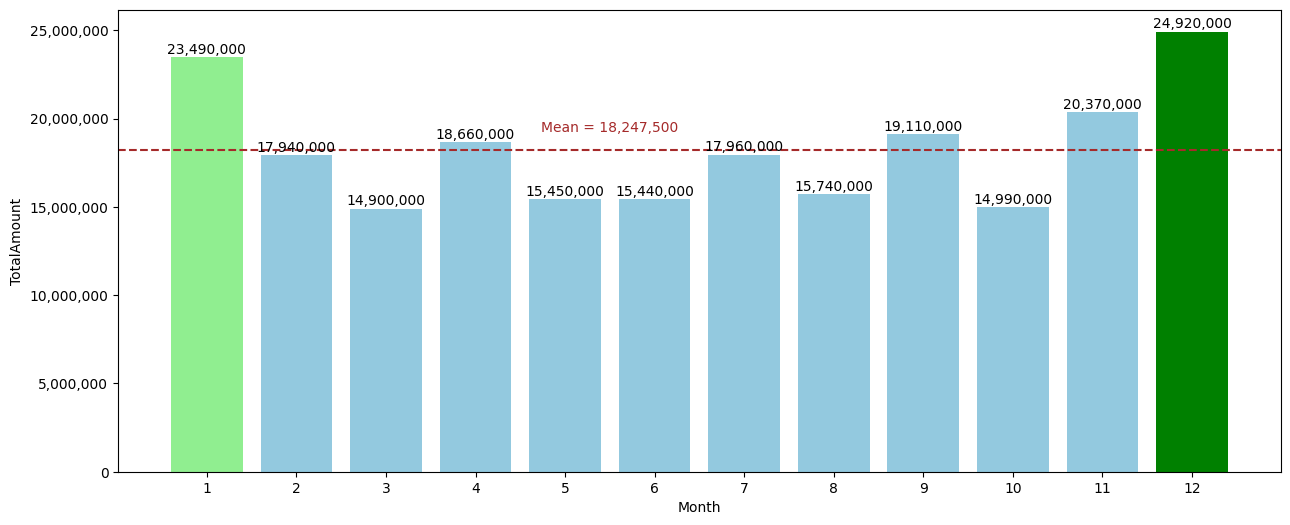

In [ ]:
a = refund[refund['created_at'].dt.year == 2022].groupby(['M'])['amount'].sum().reset_index(name='TotalAmount')
a['TotalAmount'] = a['TotalAmount'].abs()

plt.figure(figsize=(15, 6))

sns.barplot(data=a, x='M', y='TotalAmount', color='skyblue')

max_index = a['TotalAmount'].idxmax()
second_max_index = a['TotalAmount'].nlargest(2).idxmin()

plt.bar(max_index, a.loc[max_index, 'TotalAmount'], color='green')
plt.bar(second_max_index, a.loc[second_max_index, 'TotalAmount'], color='lightgreen', label='Second Highest')
plt.xlabel('Month')

# Format y-axis ticks with commas
formatter = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

for index, row in a.iterrows():
    plt.text(row.name, row['TotalAmount'] + 200000, f"{row['TotalAmount']:,.0f}", color='black', ha="center")

overall_mean_count = a['TotalAmount'].mean()
plt.axhline(y=overall_mean_count, color='brown', linestyle='--', label='Overall Mean')

plt.text(4.5, overall_mean_count + 1000000, f"Mean = {overall_mean_count:,.0f}", color='brown', ha="center")

plt.show()


In [ ]:
# 2022년 데이터만 추출
order_v2 = order[order['created_at'].dt.year == 2022]

In [ ]:
order_v2.iloc[:3]

,id,type,state,name,YM,YMD,WeekdayOrWeekend,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price,DiscountRate
0,1600585,ORDER,COMPLETED,[30일 수강] 엑,2022-12,2022-12-31,Weekend,2022-12-31 23:42:49,2022-12-31 23:42:52,1083679,10000,0,10000,0,100.0
1,1600580,ORDER,COMPLETED,한번에 끝내는 재무,2022-12,2022-12-31,Weekend,2022-12-31 23:39:01,2022-12-31 23:39:25,129176,40000,40000,0,40000,0.0
2,1600579,ORDER,COMPLETED,네오아카데미 : 까,2022-12,2022-12-31,Weekend,2022-12-31 23:38:31,2022-12-31 23:39:17,1072552,20000,10000,10000,10000,50.0


In [ ]:
# 월 정보 추가하기
order_v2.insert(4, 'M', order_v2['created_at'].dt.month)

In [ ]:
# 주문수 대비 환불률 살펴보기 위해서 월별 주문건수 세기
OrderPerMonth = order_v2.groupby(['M'])['M'].value_counts().reset_index(name = 'NumOrders')
OrderPerMonth

,M,NumOrders
0,1,30725
1,2,23428
2,3,19991
3,4,18112
4,5,17156
5,6,20998
6,7,23753
7,8,24639
8,9,22221
9,10,21488


In [ ]:
# 2022년 데티터만 추출
refund_v2 = refund[refund['created_at'].dt.year == 2022]

In [ ]:
# 주문수 대비 환불률 살펴보기 위해서 월별 환불건수 세기

RefundPerMonth = refund_v2.groupby(['M'])['M'].value_counts().reset_index(name = 'NumRefunds')
RefundPerMonth

,M,NumRefunds
0,1,1419
1,2,1094
2,3,869
3,4,945
4,5,881
5,6,942
6,7,974
7,8,1009
8,9,1124
9,10,927


In [ ]:
# 월별 주문/환불 건수 테이블 합치기

Order_Refund_PerMonth = pd.merge(OrderPerMonth, RefundPerMonth, on='M', how='left')
Order_Refund_PerMonth

,M,NumOrders,NumRefunds
0,1,30725,1419
1,2,23428,1094
2,3,19991,869
3,4,18112,945
4,5,17156,881
5,6,20998,942
6,7,23753,974
7,8,24639,1009
8,9,22221,1124
9,10,21488,927


In [ ]:
# 월별 주문건수 대비 환불건수 계산하기
Order_Refund_PerMonth['Ratio'] = round(Order_Refund_PerMonth['NumRefunds']/Order_Refund_PerMonth['NumOrders']*100, 2)

In [ ]:
Order_Refund_PerMonth

,M,NumOrders,NumRefunds,Ratio
0,1,30725,1419,4.62
1,2,23428,1094,4.67
2,3,19991,869,4.35
3,4,18112,945,5.22
4,5,17156,881,5.14
5,6,20998,942,4.49
6,7,23753,974,4.10
7,8,24639,1009,4.10
8,9,22221,1124,5.06
9,10,21488,927,4.31


In [ ]:
refund_v2.iloc[:3]

,id,type,state,M,created_at,updated_at,user_id,course_id,amount,tax_free_amount
0,72124,ADMIN_AUTO_REFUND,COMPLETED,12,2022-12-30 07:29:00,2022-12-30 7:29,619833.0,214323.0,-20000,-20000
1,72121,ADMIN_AUTO_REFUND,COMPLETED,12,2022-12-30 07:01:00,2022-12-30 7:01,146614.0,213905.0,-10000,-10000
2,72119,ADMIN_AUTO_REFUND,COMPLETED,12,2022-12-30 06:08:00,2022-12-30 6:08,541404.0,214402.0,0,0


In [ ]:
# 특정 위치에 주중인지 주말인지에 대한 정보가 들어간 컬럼 추가하기
refund_v2.insert(3, 'DayOfWeek', refund_v2['created_at'].dt.dayofweek)

In [ ]:
# 숫자로 된 요일 수정하기
refund_v2['DayOfWeek'] = refund_v2['created_at'].dt.dayofweek.map({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'})

In [ ]:
refund_v2.iloc[:3]

,id,type,state,DayOfWeek,M,created_at,updated_at,user_id,course_id,amount,tax_free_amount
0,72124,ADMIN_AUTO_REFUND,COMPLETED,Fri,12,2022-12-30 07:29:00,2022-12-30 7:29,619833.0,214323.0,-20000,-20000
1,72121,ADMIN_AUTO_REFUND,COMPLETED,Fri,12,2022-12-30 07:01:00,2022-12-30 7:01,146614.0,213905.0,-10000,-10000
2,72119,ADMIN_AUTO_REFUND,COMPLETED,Fri,12,2022-12-30 06:08:00,2022-12-30 6:08,541404.0,214402.0,0,0


In [ ]:
refund_v2['DayOfWeek'].unique()

array(['Fri', 'Thu', 'Wed', 'Tue', 'Mon'], dtype=object)

In [ ]:
# 요일별 환불건수 세기
a = refund_v2.groupby(['DayOfWeek'])['DayOfWeek'].value_counts().reset_index()
a

,DayOfWeek,count
0,Fri,2032
1,Mon,3878
2,Thu,2182
3,Tue,2620
4,Wed,1962


In [ ]:
# 요일로 오름차순 정렬하기위한 작업
a['DayOfWeek_v2'] = a['DayOfWeek']
a['DayOfWeek_v2'] = a['DayOfWeek_v2'].replace('Mon', 1).replace('Tue', 2).replace('Wed', 3).replace('Thu', 4).replace('Fri', 5)
a

,DayOfWeek,count,DayOfWeek_v2
0,Fri,2032,5
1,Mon,3878,1
2,Thu,2182,4
3,Tue,2620,2
4,Wed,1962,3


In [ ]:
# 요일로 오름차순 정렬하기
a = a.sort_values(by='DayOfWeek_v2')
a = a.reset_index(drop=True)

In [ ]:
a

,DayOfWeek,count,DayOfWeek_v2
0,Mon,3878,1
1,Tue,2620,2
2,Wed,1962,3
3,Thu,2182,4
4,Fri,2032,5


In [ ]:
# 환불이 많이 일어나는 요일 비율 계산하기
a['Ratio'] = round(a['count']/a['count'].sum()*100, 2)

In [ ]:
# 필요한 컬럼만 선별하기
a = a[['DayOfWeek', 'count', 'Ratio']]

# 컬럼명 변경하기
a = a.rename(columns = {'count':'Count'})

In [ ]:
a

,DayOfWeek,Count,Ratio
0,Mon,3878,30.60
1,Tue,2620,20.67
2,Wed,1962,15.48
3,Thu,2182,17.22
4,Fri,2032,16.03


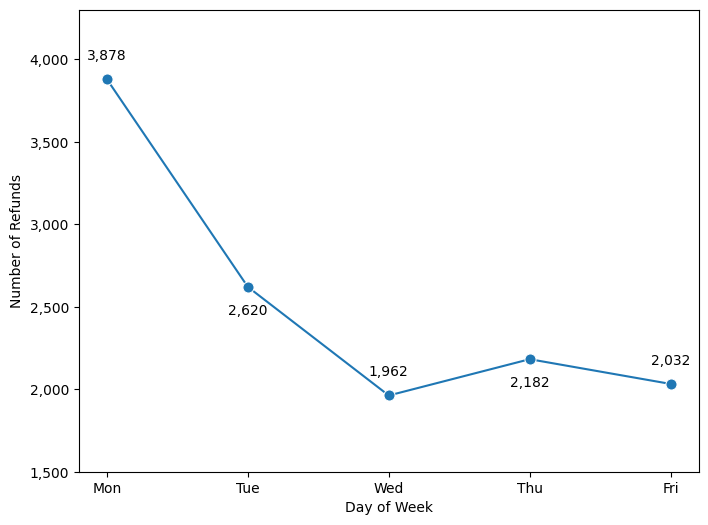

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

x = a['DayOfWeek']
y = a['Count']

plt.figure(figsize=(8, 6))
sns.lineplot(x=x, y=y, marker='o', markersize=8)

formatter = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

above_line = True

for i, val in enumerate(y):
    offset = 100 if above_line else -100
    plt.text(x[i], val + offset, f'{val:,.0f}', color='black', ha='center', va='bottom' if above_line else 'top')
    above_line = not above_line

plt.xlabel('Day of Week')
plt.ylabel('Number of Refunds')

plt.ylim(1500, 4300)

plt.show()
